# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
(summary_ob_f07, context_ob_f07, model_ob_f07, metric_ob_f07) = pickle.load(open( '19-02-01_results_over_baseline_faces_07.p', "rb"))
(summary_ob_f05, context_ob_f05, model_ob_f05, metric_ob_f05) = pickle.load(open( '19-02-01_results_over_baseline_faces_05.p', "rb"))
(summary_ob_f03, context_ob_f03, model_ob_f03, metric_ob_f03) = pickle.load(open( '19-02-01_results_over_baseline_faces_03.p', "rb"))

## Get AUC scores

In [8]:
auc_table = summary[:,:,3]
auc_f03_table = summary_f03[:,:,3]
auc_f05_table = summary_f05[:,:,3]
auc_f07_table = summary_f07[:,:,3]

## Change scores into DataFrames

In [9]:
AUC = pd.DataFrame(data=auc_table, columns=model, index=context)
AUC.columns.name='models'
AUC.index.name='context'

AUC = AUC.transpose()

faces = AUC.loc['faces']
dg = AUC.loc['dg']
AUC = AUC.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

AUC

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.698040,0.707347,0.682952,0.681585,0.683133,0.729921
cas,0.692052,0.703851,0.672925,0.667086,0.670638,0.728063
covsal,0.746774,0.754006,0.735052,0.733442,0.726257,0.767142
gbvs,0.749465,0.758711,0.734478,0.734344,0.728549,0.783232
icf,0.701568,0.711141,0.686049,0.679900,0.682979,0.717650
ik,0.663008,0.673263,0.646383,0.656406,0.652015,0.688133
sun,0.603264,0.599431,0.609479,0.560426,0.589477,0.595790


In [10]:
AUC['mean context'] = AUC.mean(axis=1)
AUC = AUC.transpose()
AUC['mean model'] = AUC.mean(axis=1)
AUC = AUC.transpose()
AUC

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.698040,0.707347,0.682952,0.681585,0.683133,0.729921,0.697163
cas,0.692052,0.703851,0.672925,0.667086,0.670638,0.728063,0.689103
covsal,0.746774,0.754006,0.735052,0.733442,0.726257,0.767142,0.743779
gbvs,0.749465,0.758711,0.734478,0.734344,0.728549,0.783232,0.748130
icf,0.701568,0.711141,0.686049,0.679900,0.682979,0.717650,0.696548
ik,0.663008,0.673263,0.646383,0.656406,0.652015,0.688133,0.663201
sun,0.603264,0.599431,0.609479,0.560426,0.589477,0.595790,0.592978
mean model,0.693453,0.701107,0.681045,0.673313,0.676150,0.715705,0.690129


In [11]:
AUC_mean_model = AUC.loc['mean model']
AUC_mean_context = AUC.transpose().loc['mean context']

In [12]:
AUC_f03 = pd.DataFrame(data=auc_f03_table, columns=model_f03, index=context_f03)
AUC_f03.columns.name='models'
AUC_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
AUC_f03 = AUC_f03.rename(index=str, columns=col).transpose()

AUC_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.701392,0.713620,0.681570,0.681863,0.689665,0.730011
cas,0.695769,0.710621,0.671564,0.668491,0.676538,0.729025
covsal,0.750548,0.760145,0.734990,0.735682,0.732640,0.768929
gbvs,0.752009,0.763010,0.734177,0.735972,0.732871,0.784090
icf,0.703955,0.715215,0.685701,0.680453,0.686559,0.719037
ik,0.668251,0.682089,0.645819,0.658155,0.661111,0.690817
sun,0.611347,0.613150,0.608425,0.562480,0.601873,0.599777


In [13]:
AUC_f03['mean context'] = AUC_f03.mean(axis=1)
AUC_f03 = AUC_f03.transpose()
AUC_f03['mean model'] = AUC_f03.mean(axis=1)
AUC_f03 = AUC_f03.transpose()
AUC_f03

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.701392,0.713620,0.681570,0.681863,0.689665,0.730011,0.699687
cas,0.695769,0.710621,0.671564,0.668491,0.676538,0.729025,0.692001
covsal,0.750548,0.760145,0.734990,0.735682,0.732640,0.768929,0.747156
gbvs,0.752009,0.763010,0.734177,0.735972,0.732871,0.784090,0.750355
icf,0.703955,0.715215,0.685701,0.680453,0.686559,0.719037,0.698487
ik,0.668251,0.682089,0.645819,0.658155,0.661111,0.690817,0.667707
sun,0.611347,0.613150,0.608425,0.562480,0.601873,0.599777,0.599509
mean model,0.697610,0.708264,0.680321,0.674728,0.683037,0.717384,0.693557


In [14]:
AUC_f03_mean_model = AUC_f03.loc['mean model']
AUC_f03_mean_context = AUC_f03.transpose().loc['mean context']

In [15]:
AUC_f05 = pd.DataFrame(data=auc_f05_table, columns=model_f05, index=context_f05)
AUC_f05.columns.name='models'
AUC_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
AUC_f05 = AUC_f05.rename(index=str, columns=col).transpose()

AUC_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.702716,0.715734,0.681613,0.682210,0.692044,0.730439
cas,0.697598,0.713322,0.672109,0.668932,0.680393,0.729163
covsal,0.751736,0.762012,0.735077,0.736452,0.734824,0.769649
gbvs,0.752898,0.764442,0.734184,0.736536,0.734617,0.784087
icf,0.704762,0.716543,0.685663,0.680618,0.687945,0.719901
ik,0.669794,0.684588,0.645813,0.658868,0.664084,0.691309
sun,0.613976,0.617384,0.608452,0.563758,0.605716,0.601674


In [16]:
AUC_f05['mean context'] = AUC_f05.mean(axis=1)
AUC_f05 = AUC_f05.transpose()
AUC_f05['mean model'] = AUC_f05.mean(axis=1)
AUC_f05 = AUC_f05.transpose()
AUC_f05

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.702716,0.715734,0.681613,0.682210,0.692044,0.730439,0.700793
cas,0.697598,0.713322,0.672109,0.668932,0.680393,0.729163,0.693586
covsal,0.751736,0.762012,0.735077,0.736452,0.734824,0.769649,0.748292
gbvs,0.752898,0.764442,0.734184,0.736536,0.734617,0.784087,0.751127
icf,0.704762,0.716543,0.685663,0.680618,0.687945,0.719901,0.699239
ik,0.669794,0.684588,0.645813,0.658868,0.664084,0.691309,0.669076
sun,0.613976,0.617384,0.608452,0.563758,0.605716,0.601674,0.601827
mean model,0.699069,0.710575,0.680416,0.675339,0.685660,0.718032,0.694848


In [17]:
AUC_f05_mean_model = AUC_f05.loc['mean model']
AUC_f05_mean_context = AUC_f05.transpose().loc['mean context']

In [18]:
AUC_f07 = pd.DataFrame(data=auc_f07_table, columns=model_f07, index=context_f07)
AUC_f07.columns.name='models'
AUC_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
AUC_f07 = AUC_f07.rename(index=str, columns=col).transpose()

AUC_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.703589,0.717085,0.681711,0.682661,0.693656,0.731142
cas,0.698546,0.714773,0.672241,0.669232,0.682526,0.729582
covsal,0.753049,0.763897,0.735464,0.737088,0.737128,0.770830
gbvs,0.753201,0.764895,0.734245,0.736809,0.735714,0.784198
icf,0.705782,0.718012,0.685956,0.681121,0.690002,0.721120
ik,0.670892,0.686282,0.645943,0.659359,0.666581,0.692061
sun,0.615479,0.619786,0.608496,0.564438,0.608479,0.602998


In [19]:
AUC_f07['mean context'] = AUC_f07.mean(axis=1)
AUC_f07 = AUC_f07.transpose()
AUC_f07['mean model'] = AUC_f07.mean(axis=1)
AUC_f07 = AUC_f07.transpose()
AUC_f07

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.703589,0.717085,0.681711,0.682661,0.693656,0.731142,0.701641
cas,0.698546,0.714773,0.672241,0.669232,0.682526,0.729582,0.694483
covsal,0.753049,0.763897,0.735464,0.737088,0.737128,0.770830,0.749576
gbvs,0.753201,0.764895,0.734245,0.736809,0.735714,0.784198,0.751510
icf,0.705782,0.718012,0.685956,0.681121,0.690002,0.721120,0.700332
ik,0.670892,0.686282,0.645943,0.659359,0.666581,0.692061,0.670186
sun,0.615479,0.619786,0.608496,0.564438,0.608479,0.602998,0.603279
mean model,0.700077,0.712104,0.680580,0.675816,0.687727,0.718847,0.695858


In [20]:
AUC_f07_mean_model = AUC_f07.loc['mean model']
AUC_f07_mean_context = AUC_f07.transpose().loc['mean context']

## Create Mean Matrices

In [21]:
mean_models = pd.DataFrame([AUC_mean_model,
                           AUC_f03_mean_model,
                           AUC_f05_mean_model,
                           AUC_f07_mean_model], index=[0,0.3,0.5,0.7])

mean_models = mean_models.transpose()
mean_models = mean_models.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
mean_models

,0.0,0.3,0.5,0.7
context,,,,
all,0.693453,0.697610,0.699069,0.700077
person,0.701107,0.708264,0.710575,0.712104
no person,0.681045,0.680321,0.680416,0.680580
animal,0.673313,0.674728,0.675339,0.675816
electronic,0.676150,0.683037,0.685660,0.687727
sports,0.715705,0.717384,0.718032,0.718847


In [22]:
mean_contexts = pd.DataFrame([AUC_mean_context,
                              AUC_f03_mean_context,
                              AUC_f05_mean_context,
                              AUC_f07_mean_context], index=[0,0.3,0.5,0.7])
mean_contexts

models,aim,cas,covsal,gbvs,icf,ik,sun,mean model
0.0,0.697163,0.689103,0.743779,0.748130,0.696548,0.663201,0.592978,0.690129
0.3,0.699687,0.692001,0.747156,0.750355,0.698487,0.667707,0.599509,0.693557
0.5,0.700793,0.693586,0.748292,0.751127,0.699239,0.669076,0.601827,0.694848
0.7,0.701641,0.694483,0.749576,0.751510,0.700332,0.670186,0.603279,0.695858


In [23]:
mean_contexts = mean_contexts.transpose()
mean_contexts = mean_contexts.loc[['aim', 'cas','covsal', 'gbvs', 'icf', 'ik', 'sun']]
mean_contexts

,0.0,0.3,0.5,0.7
models,,,,
aim,0.697163,0.699687,0.700793,0.701641
cas,0.689103,0.692001,0.693586,0.694483
covsal,0.743779,0.747156,0.748292,0.749576
gbvs,0.748130,0.750355,0.751127,0.751510
icf,0.696548,0.698487,0.699239,0.700332
ik,0.663201,0.667707,0.669076,0.670186
sun,0.592978,0.599509,0.601827,0.603279


## Vizualization

### Data Prep

In [24]:
AUC0 = AUC.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
AUC0 = AUC0.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

AUCmean_context = AUC.transpose().loc[['mean context']]
AUCmean_context = AUCmean_context.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

AUCmean_model = AUC.loc[['mean model']]
AUCmean_model = AUCmean_model.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [25]:
AUC0_f03 = AUC_f03.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
AUC0_f03 = AUC0_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

AUCmean_context_f03 = AUC_f03.transpose().loc[['mean context']]
AUCmean_context_f03 = AUCmean_context_f03.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

AUCmean_model_f03 = AUC_f03.loc[['mean model']]
AUCmean_model_f03 = AUCmean_model_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [26]:
AUC0_f05 = AUC_f05.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
AUC0_f05 = AUC0_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

AUCmean_context_f05 = AUC_f05.transpose().loc[['mean context']]
AUCmean_context_f05 = AUCmean_context_f05.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

AUCmean_model_f05 = AUC_f05.loc[['mean model']]
AUCmean_model_f05 = AUCmean_model_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [27]:
AUC0_f07 = AUC_f07.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
AUC0_f07 = AUC0_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

AUCmean_context_f07 = AUC_f07.transpose().loc[['mean context']]
AUCmean_context_f07 = AUCmean_context_f07.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

AUCmean_model_f07 = AUC_f07.loc[['mean model']]
AUCmean_model_f07 = AUCmean_model_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [28]:
# plt.subplots(figsize=(10,11))
# gs = gridspec.GridSpec(2, 2,
#                        width_ratios=[6, 1],
#                        height_ratios=[6, 1]
#                        )

# ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])
# ax3 = plt.subplot(gs[2])

# im = sns.heatmap(AUC0, annot=True, linewidths=.5, ax=ax1, cmap='viridis', cbar=False, xticklabels='');
# sns.heatmap(AUCmean_model, annot=True, linewidths=.5, ax=ax2, cmap='viridis', yticklabels='', cbar=False);
# sns.heatmap(AUCmean_context, annot=True, linewidths=.5, ax=ax3, cmap='viridis', yticklabels='', cbar=False);

# mappable = im.get_children()[0]

# ax3.set_ylabel('mean context');
# ax2.set_ylabel('');
# ax2.set_xlabel('');
# ax1.set_xlabel('');

# # ax4 = plt.subplot(gs[3])

In [29]:
# fig, ax = plt.subplots(figsize=(20,5))
# gs = gridspec.GridSpec(2, 8,
#                        width_ratios=[6, 1, 6, 1, 6, 1, 6, 1],
#                        height_ratios=[6, 1]
#                        )

# ax01 = plt.subplot(gs[0])
# ax02 = plt.subplot(gs[1])
# ax03 = plt.subplot(gs[8])

# ax11 = plt.subplot(gs[2])
# ax12 = plt.subplot(gs[3])
# ax13 = plt.subplot(gs[10])

# ax21 = plt.subplot(gs[4])
# ax22 = plt.subplot(gs[5])
# ax23 = plt.subplot(gs[12])

# ax31 = plt.subplot(gs[6])
# ax32 = plt.subplot(gs[7])
# ax33 = plt.subplot(gs[14])

# sns.heatmap(AUC0, annot=True, linewidths=.5, ax=ax01, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
# sns.heatmap(AUCmean_model, annot=True, linewidths=.5, ax=ax02, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
# sns.heatmap(AUCmean_context, annot=True, linewidths=.5, ax=ax03, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

# sns.heatmap(AUC0_f03, annot=True, linewidths=.5, ax=ax11, cmap='viridis', cbar=False, xticklabels='');
# sns.heatmap(AUCmean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
# sns.heatmap(AUCmean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

# sns.heatmap(AUC0_f05, annot=True, linewidths=.5, ax=ax21, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
# sns.heatmap(AUCmean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
# sns.heatmap(AUCmean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

# sns.heatmap(AUC0_f07, annot=True, linewidths=.5, ax=ax31, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
# sns.heatmap(AUCmean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
# im = sns.heatmap(AUCmean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

# mappable = im.get_children()[0]

# # plt.colorbar(mappable, ax = ax);

# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')

# ax01.set_xlabel('');
# ax02.set_ylabel('');
# ax02.set_xlabel('');
# ax03.set_ylabel('');

# ax11.set_yticklabels('');
# ax11.set_xlabel('');
# ax11.set_ylabel('')
# ax12.set_ylabel('');
# ax12.set_xlabel('');
# ax13.set_ylabel('');

# ax21.set_yticklabels('');
# ax21.set_xlabel('');
# ax21.set_ylabel('')
# ax22.set_ylabel('');
# ax22.set_xlabel('');
# ax23.set_ylabel('');

# ax31.set_yticklabels('');
# ax31.set_xlabel('');
# ax31.set_ylabel('')
# ax32.set_ylabel('');
# ax32.set_xlabel('');
# ax33.set_ylabel('');

# ax01.set_title('AUC no face');
# ax11.set_title('AUC 0.3 face');
# ax21.set_title('AUC 0.5 face');
# ax31.set_title('AUC 0.7 face');

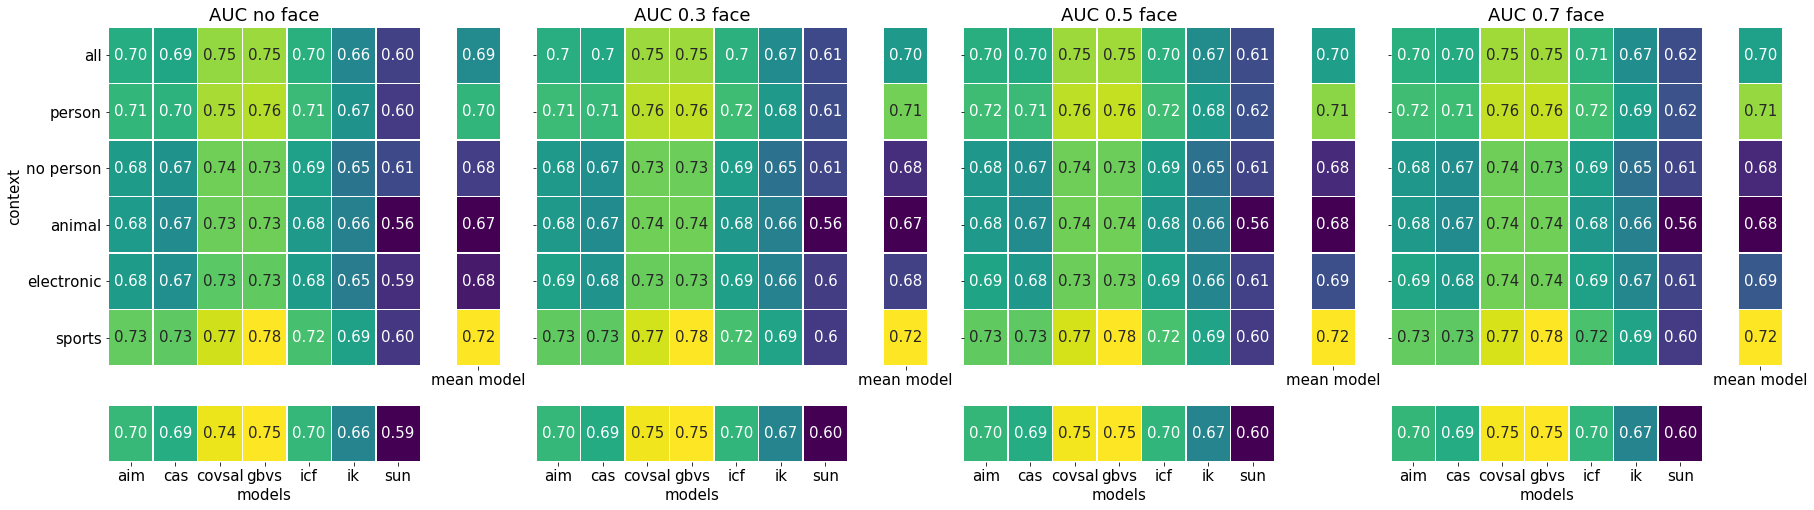

In [30]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 8,
                       width_ratios=[7, 1, 7, 1, 7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[8])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[10])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[12])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[14])

im = sns.heatmap(AUC0, annot=True, linewidths=.5, ax=ax01, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(AUCmean_model, annot=True, linewidths=.5, ax=ax02, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(AUCmean_context, annot=True, linewidths=.5, ax=ax03, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(AUC0_f03, annot=True, linewidths=.5, ax=ax11, cmap='viridis', cbar=False, xticklabels='');
sns.heatmap(AUCmean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(AUCmean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(AUC0_f05, annot=True, linewidths=.5, ax=ax21, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(AUCmean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(AUCmean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(AUC0_f07, annot=True, linewidths=.5, ax=ax31, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');

# sns.heatmap(AUCmean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=True, fmt='.2f', cbar_kws={'fraction':1, 'pad':-0.2});
sns.heatmap(AUCmean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

# plt.colorbar(mappable=im.get_children()[0], cmap='viridis')

sns.heatmap(AUCmean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');


# axes = plt.subplot(gs[8])
# fig.colorbar(mappable=im)
# fig.colorbar(im, ax=axes)


ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('AUC no face');
ax11.set_title('AUC 0.3 face');
ax21.set_title('AUC 0.5 face');
ax31.set_title('AUC 0.7 face');
plt.savefig('plots/AUC_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

In [31]:
# fig, axes = plt.subplots(
#         nrows=2, ncols=2, sharex=True, sharey=False, 
#         gridspec_kw={'height_ratios':[6,1],
#                     'width_ratios':[6,1]}
#         )


# im = sns.heatmap(AUC0, annot=True, linewidths=.5, ax=axes[0][0], cmap='viridis', cbar=False);
# sns.heatmap(AUCmean_model, annot=True, linewidths=.5, ax=axes[0][1], cmap='viridis', yticklabels='', cbar=False);
# sns.heatmap(AUCmean_context, annot=True, linewidths=.5, ax=axes[1][0], cmap='viridis', yticklabels='', cbar=False);


# plt.show()

In [32]:
# fig, ax = plt.subplots(1, 4,figsize=(30, 10), sharex=True, sharey=True)

# im = sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
# sns.heatmap(AUC_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
# sns.heatmap(AUC_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
# sns.heatmap(AUC_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

# mappable = im.get_children()[0]
# # plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
# plt.colorbar(mappable, ax = ax);

# ax[0].set_title('AUC plain');
# ax[1].set_title('AUC f03');
# ax[2].set_title('AUC f05');
# ax[3].set_title('AUC f07');
# # plt.savefig('plots/AUC_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

In [33]:
# fig, ax = plt.subplots(1, 4,figsize=(30, 10), sharex=True, sharey=True)

# im = sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
# sns.heatmap(AUC_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
# sns.heatmap(AUC_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
# sns.heatmap(AUC_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

# mappable = im.get_children()[0]
# # plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
# plt.colorbar(mappable, ax = ax);

# ax[0].set_title('AUC plain');
# ax[1].set_title('AUC f03');
# ax[2].set_title('AUC f05');
# ax[3].set_title('AUC f07');
# # plt.savefig('plots/AUC_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

## Vizualization of means

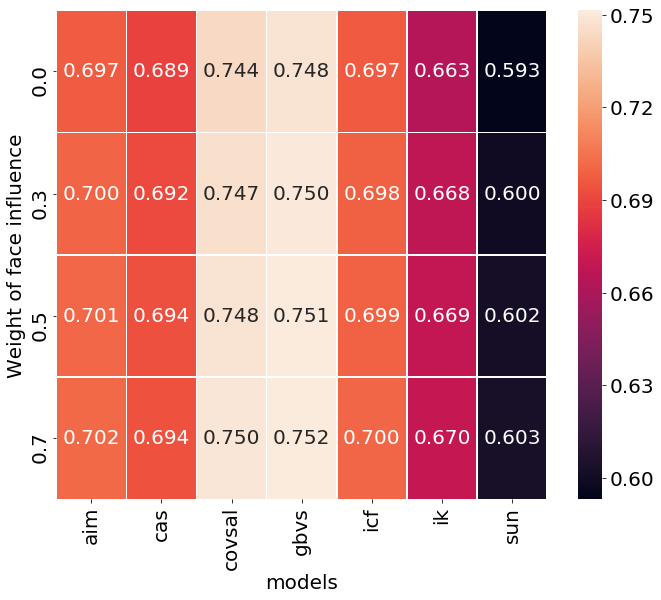

In [34]:
matplotlib.rcParams.update({'font.size': 20})

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');

# plt.title('AUC scores of different models');
plt.ylabel('Weight of face influence')
plt.xticks(rotation=90)

plt.savefig('plots/AUC_performance_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

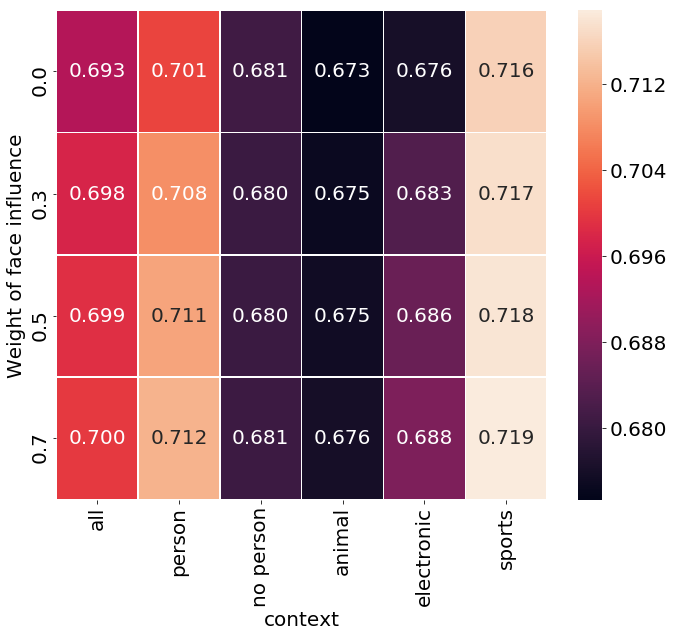

In [35]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');
# 
# plt.title('AUC scores of different context');
plt.ylabel('Weight of face influence')

plt.savefig('plots/AUC_performance_mean_model.jpg', bbox_inches='tight', pad_inches=0)

### Relative Error

In [36]:
AUC0 = AUC.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'mean model']]

In [37]:
AUC_diff_f03 = ((AUC_f03 - AUC0) / AUC0)*100
AUC_diff_f05 = ((AUC_f05 - AUC0) / AUC0)*100
AUC_diff_f07 = ((AUC_f07 - AUC0) / AUC0)*100

#### Get mean of models and mean of contexts in diff out

In [38]:
mean_model_diff_f03 = AUC_diff_f03.loc['mean model']
mean_model_diff_f05 = AUC_diff_f05.loc['mean model']
mean_model_diff_f07 = AUC_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
context,,,
all,0.599474,0.809793,0.955178
person,1.020830,1.350435,1.568536
no person,-0.106358,-0.092432,-0.068398
animal,0.210224,0.300991,0.371744
electronic,1.018592,1.406616,1.712202
sports,0.234636,0.325167,0.439131
mean context,0.496811,0.683899,0.830230


In [39]:
mean_context_diff_f03 = AUC_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = AUC_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = AUC_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
models,,,
aim,0.362052,0.520655,0.642290
cas,0.420669,0.650640,0.780828
covsal,0.454015,0.606769,0.779441
gbvs,0.297443,0.400656,0.451862
icf,0.278337,0.386326,0.543306
ik,0.679390,0.885814,1.053258
sun,1.101376,1.492293,1.737272
mean model,0.496811,0.683899,0.830230


## Vizualize relative errors

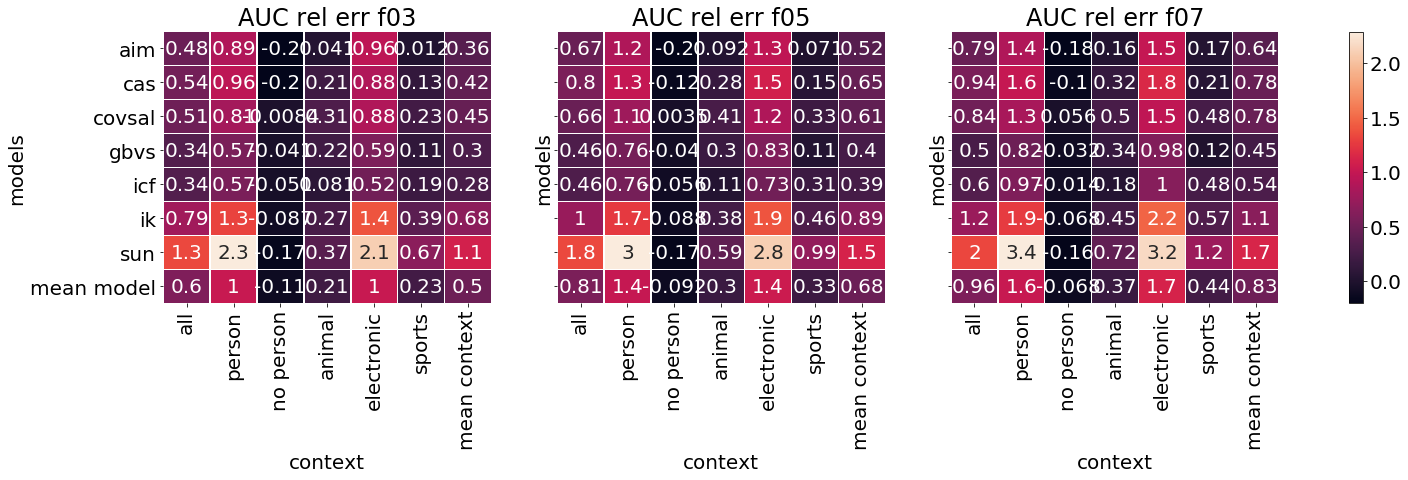

In [40]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(AUC_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(AUC_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(AUC_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('AUC rel err f03');
ax[1].set_title('AUC rel err f05');
ax[2].set_title('AUC rel err f07');
# plt.savefig('plots/AUC_sep_diff_with_mean.jpg', bbox_inches='tight', pad_inches=0)

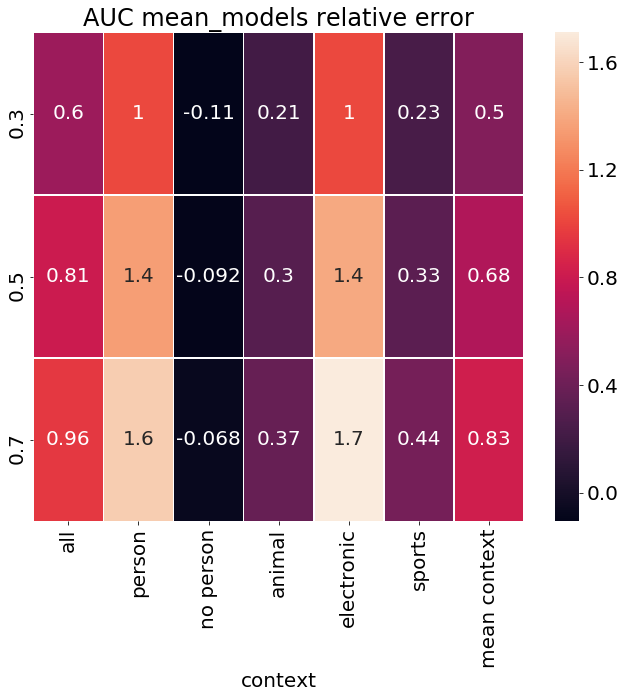

In [41]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('AUC mean_models relative error');
# plt.savefig('plots/AUC_mean_models_diff.jpg', bbox_inches='tight', pad_inches=0)

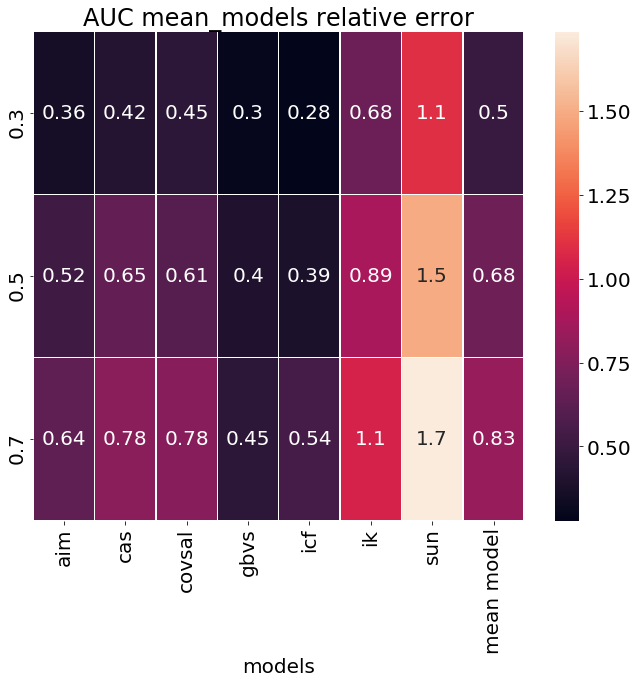

In [42]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_context_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('AUC mean_models relative error');
# plt.savefig('plots/AUC_mean_contexts_diff.jpg', bbox_inches='tight', pad_inches=0)

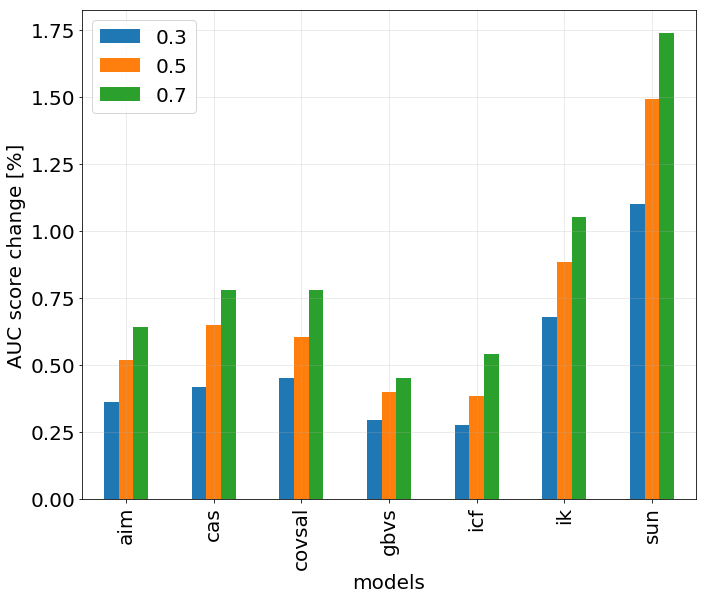

In [43]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel('AUC score change [%]');

plt.savefig('plots/AUC_improvment_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

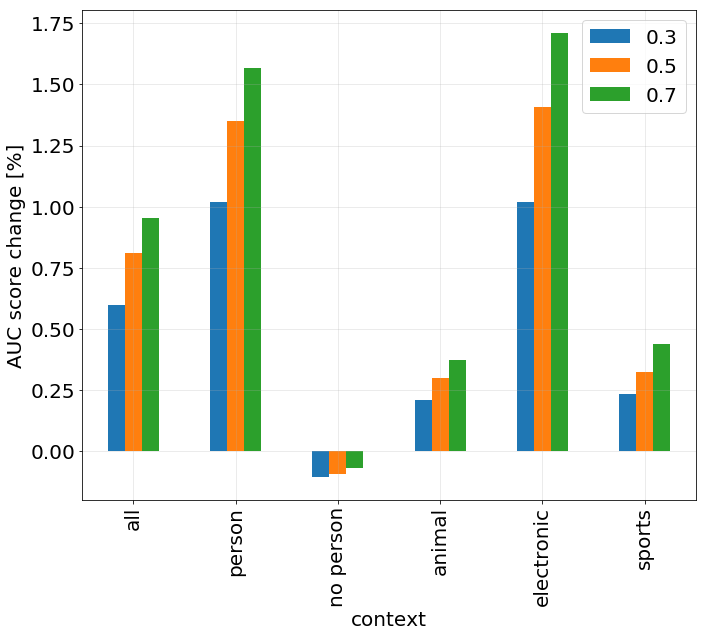

In [44]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel('AUC score change [%]');

plt.savefig('plots/AUC_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)

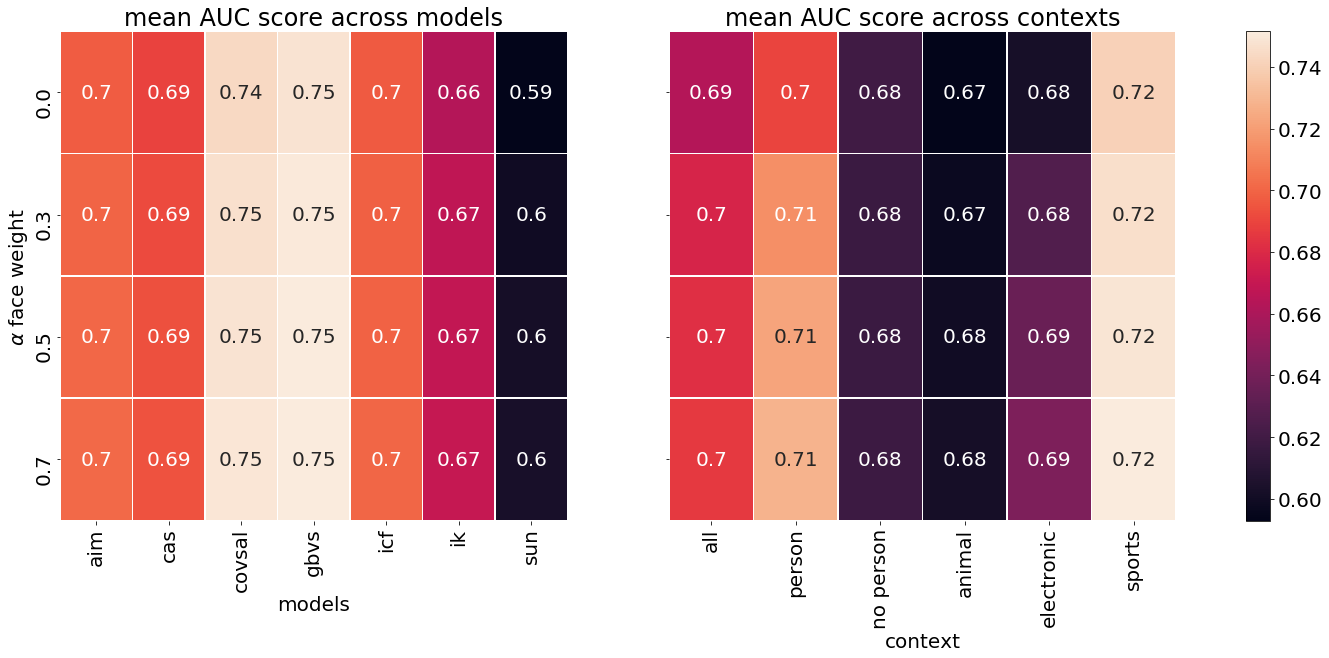

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

im = sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax[1], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('mean AUC score across models')
ax[1].set_title('mean AUC score across contexts')

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

ax[0].set_ylabel(r'$\alpha$ face weight')


plt.savefig('plots/AUC_performance_mean_both.jpg', bbox_inches='tight', pad_inches=0)

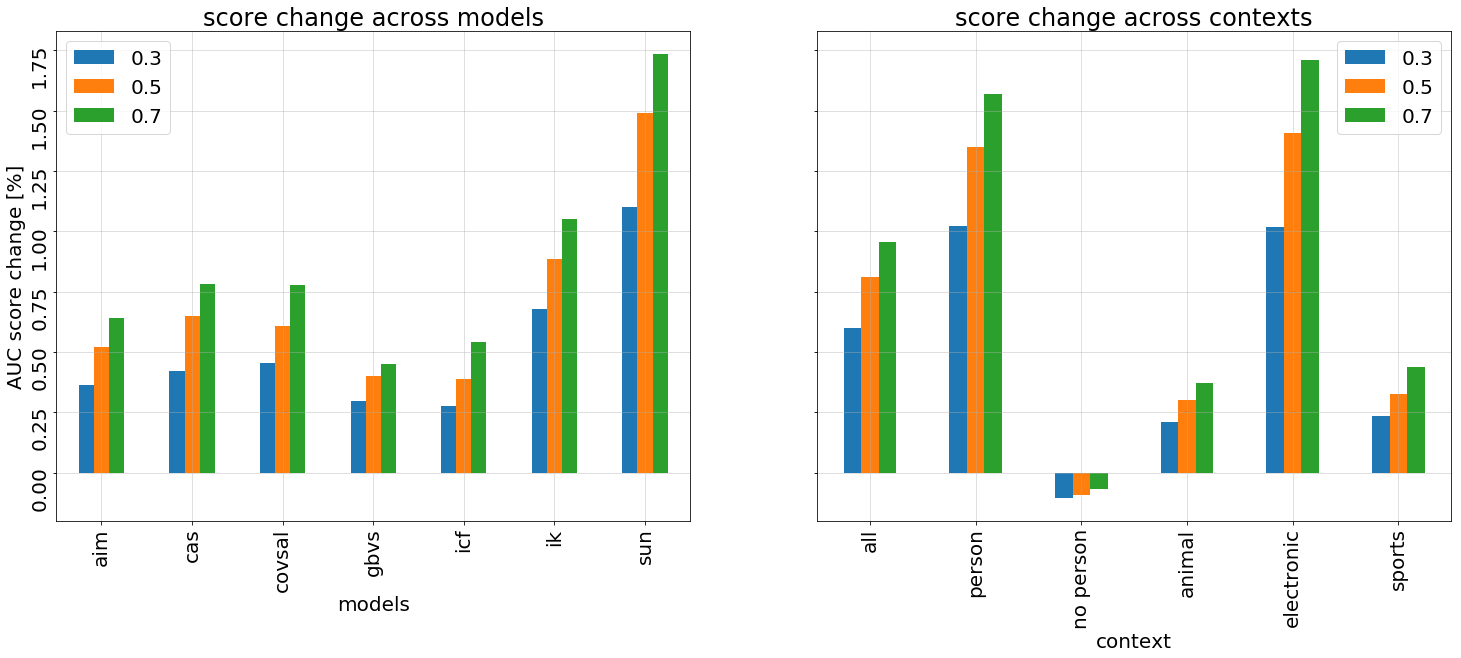

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

mean_context_diff.plot.bar(ax=ax[0]);
mean_models_diff.plot.bar(ax=ax[1]);

ax[0].set_title('score change across models')
ax[1].set_title('score change across contexts')

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)


ax[0].set_ylabel('AUC score change [%]');

plt.savefig('plots/AUC_improvements_mean_both.jpg', bbox_inches='tight', pad_inches=0)